# Simple models benchmark 

## Libraries

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os

## Loading data

We are here taking the datasets preprocessed following the methods implemented in 'preprocessing.ipynb' notebook.


In [12]:
repository_path = r'C:\\Users\\hugot\\Documents\\Code\\EL_project' #change for your own path

In [13]:
# After downloading the X_train/X_test/Y_train .csv files in your working directory:
X_train_path = os.path.join(repository_path, 'datasets\\X_train_preprocessed.csv')
X_train = pd.read_csv(X_train_path)
X_train_ids = X_train["ID"] #We keep the IDs in a separate variable
X_train = X_train.drop("ID", axis = 1) #We remove the IDs from the training set

Y_train_path = os.path.join(repository_path, 'datasets\\y_train.csv')
Y_train = pd.read_csv(Y_train_path)
Y_train_ids = Y_train["ID"]
Y_train = Y_train.drop("ID", axis = 1)

X_test_path = os.path.join(repository_path, 'datasets\\X_test_preprocessed.csv')
X_test = pd.read_csv(X_test_path)
X_test_ids = X_test["ID"]
X_test = X_test.drop("ID", axis = 1)



In [14]:
X_train.head()

,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,COUNTRY_FR,energy_wind,energy_solar,weather_impact,net_energy_ratio,cross_feature,FR_temp_impact,DE_temp_impact,REN_NON,carbon_intensity
0,0.210099,-0.427458,-0.606523,0.606523,-0.306899,0.692860,0.306899,-0.692860,0.441238,-0.213766,...,True,-3.764056,-2.921715,-0.115632,-2.183893,-2.259287,-0.490862,-0.858971,13.056610,-2.132838
1,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,...,True,-67.963185,-3.226242,0.621845,0.000556,-4.051804,0.827788,0.415020,-9.337436,0.596555
2,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,...,True,0.309049,-0.187520,-0.244135,-1.324031,0.058913,2.093502,2.079919,-0.176691,0.379201
3,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,...,False,0.507879,-0.662913,-0.670238,0.381427,-0.384711,-1.266712,-0.632386,-1.572342,-0.335867
4,0.143807,-0.617038,-0.924990,0.924990,-0.306899,0.990324,0.306899,-0.990324,0.238693,-0.240862,...,True,-7.566776,-1.172680,0.337934,-1.029640,0.466701,0.112457,0.758146,-0.308411,-3.743874


In [15]:
Y_train.head()

,TARGET
0,0.028313
1,-0.112516
2,-0.180840
3,-0.260356
4,-0.071733


## Some utils functions

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    """
    Evaluate a regression model and return MSE, MAE, and R-squared.
    
    Parameters:
    - model: A trained regression model from Scikit-learn.
    - X_test: Test features.
    - y_test: True target values.

    Returns:
    - mse: Mean Squared Error.
    - mae: Mean Absolute Error.
    - r2: R-squared.
    """
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, mae, r2

def plot_predictions(model, X_test, Y_test):
    """
    Plot the predictions of a regression model.
    
    Parameters:
    - y_test: True target values.
    - y_pred: Predicted target values.
    """
    # Predict on test set
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))

    # Plot true values
    plt.scatter(Y_test, Y_test, color = "b", label = "True values")

    # Plot predicted values
    plt.scatter(Y_test, y_pred, color = "r", label = "Predicted values")

    plt.title('True vs Predicted Values')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.show()

## Defining the models

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#I'm not able to run XGBoost so I commented it
#from xgboost import XGBRegressor

def get_model(model_wanted: str, X_train, Y_train, parameters = None) -> object:

    if model_wanted == "linear_regression": #provided in by ENS
        lr = LinearRegression()
        lr.fit(X_train, Y_train)
        return lr
    
    elif model_wanted == "random_forest": #2nd lecture
        rf = RandomForestRegressor(**parameters)
        rf.fit(X_train, Y_train)
        return rf
    
    elif model_wanted == "gradient_boosting": #parameters to tune
        gb = GradientBoostingRegressor(**parameters)
        gb.fit(X_train, Y_train)
        return gb

    
    else:
        raise ValueError("Invalid model name")


## Benchmarking

In [18]:
#Defining the model to test. Template : {"model_name" : {"parameter1" : value1, "parameter2" : value2, ...}}
#If the model has no parameters to tune, the value is None
models_to_test = {"linear_regression" : None, 
                  "random_forest" : {"n_estimators" : 100, "random_state" :777}, 
                  "gradient_boosting" : {"n_estimators" :100, "random_state" :777}, 
                  }


In [19]:
import time

results = []
for model_wanted, params in models_to_test.items():
    start_time = time.time()
    model = get_model(model_wanted, X_train, Y_train, params)
    training_time = time.time() - start_time
    
    mse, mae, r2 = evaluate_model(model, X_train, Y_train)
    results.append({"Model": model_wanted, "MSE": mse, "MAE": mae, "R-squared": r2, "Training Time (s)": training_time})

    #Then use the model for predictions
    Y_test = model.predict(X_test)
    #We create a dataframe with the predictions
    Y_test = pd.concat([X_test_ids, pd.DataFrame(Y_test)], axis = 1)
    #Save the results in a csv file
    path = os.path.join(repository_path, f"results\\y_test_simple_{model_wanted}.csv")
    Y_test.to_csv(path, index = False)


results_df = pd.DataFrame(results)


C:\Users\hugot\AppData\Local\Temp\ipykernel_17380\2536555708.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
results_df

,Model,MSE,MAE,R-squared,Training Time (s)
0,linear_regression,1.005881,0.571140,0.059612,0.010603
1,random_forest,0.172495,0.244220,0.838737,6.371138
2,gradient_boosting,0.563034,0.458647,0.473624,1.277884


## Interpretability of some models

### Random forest

In [21]:

model = RandomForestRegressor(n_estimators= 100, random_state = 777)
model.fit(X_train, Y_train)


C:\Users\hugot\AppData\Local\Temp\ipykernel_17380\1720740698.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestRegressor(random_state=777)

Feature importance based on mean decrease in impurity

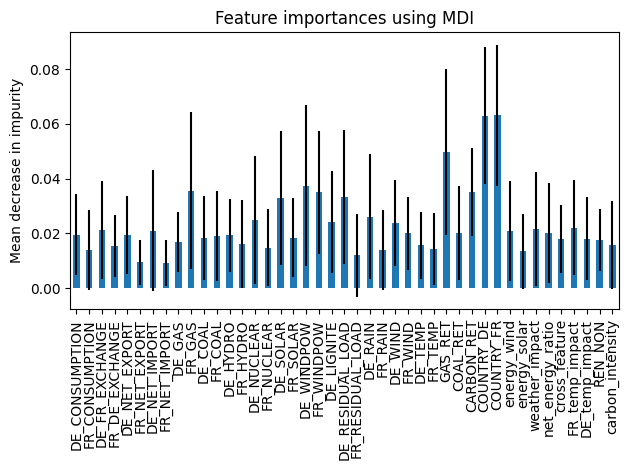

In [22]:

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature importance based on feature permutation

Elapsed time to compute the importances: 16.310 seconds


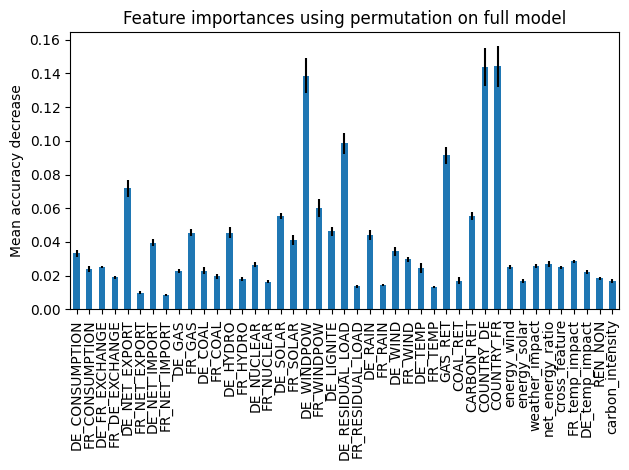

In [23]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model, X_train, Y_train, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Individual tree analysis

[Text(0.1408068815164541, 0.9891304347826086, 'GAS_RET <= -2.118\nsquared_error = 0.983\nsamples = 930\nvalue = 0.11'),
 Text(0.011899612840610594, 0.967391304347826, 'DE_RAIN <= -0.845\nsquared_error = 7.143\nsamples = 18\nvalue = 1.265'),
 Text(0.010549302163661874, 0.9456521739130435, 'squared_error = 0.0\nsamples = 1\nvalue = 7.787'),
 Text(0.013249923517559313, 0.9456521739130435, 'net_energy_ratio <= -1.834\nsquared_error = 2.285\nsamples = 17\nvalue = 0.483'),
 Text(0.00540124270779488, 0.9239130434782609, 'DE_NET_EXPORT <= -0.399\nsquared_error = 3.549\nsamples = 5\nvalue = 1.733'),
 Text(0.00270062135389744, 0.9021739130434783, 'COUNTRY_FR <= 0.5\nsquared_error = 7.974\nsamples = 2\nvalue = 2.193'),
 Text(0.00135031067694872, 0.8804347826086957, 'squared_error = 0.0\nsamples = 1\nvalue = 5.016'),
 Text(0.004050932030846159, 0.8804347826086957, 'squared_error = 0.0\nsamples = 1\nvalue = -0.631'),
 Text(0.008101864061692318, 0.9021739130434783, 'COUNTRY_DE <= 0.5\nsquared_error 

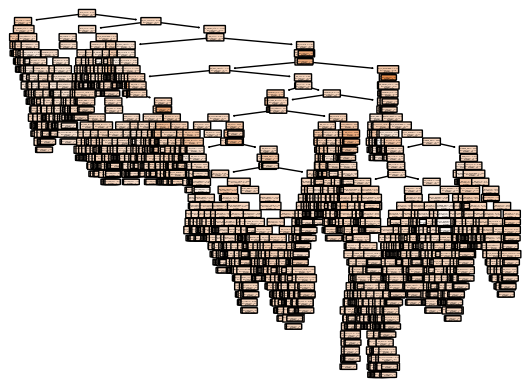

In [24]:
from sklearn.tree import plot_tree

# Choose a tree index
tree_index = 0

# Access the tree
tree = model.estimators_[tree_index]

# Plot the tree directly in your notebook
plot_tree(tree, feature_names=X_test.columns, filled=True, rounded=True)

As we can see, the tree is really deep and complex to interpretate 

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


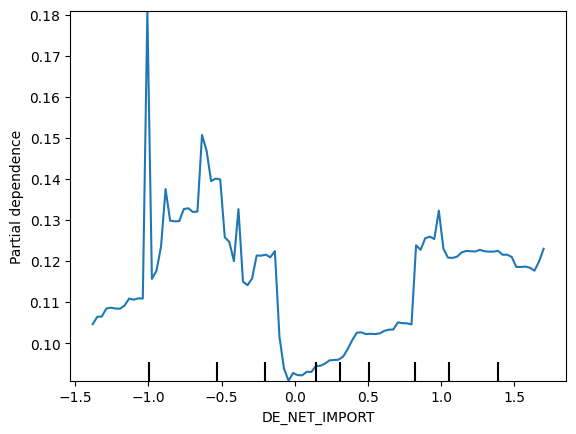

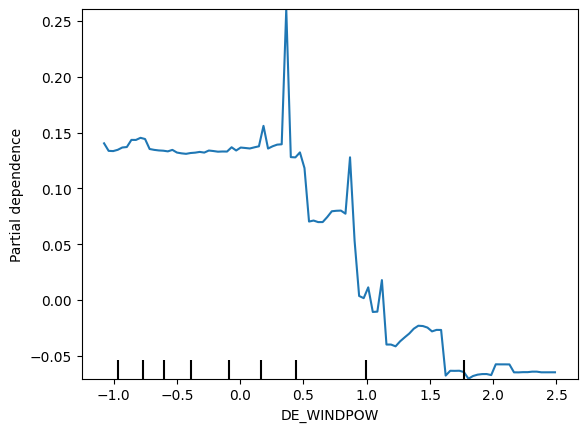

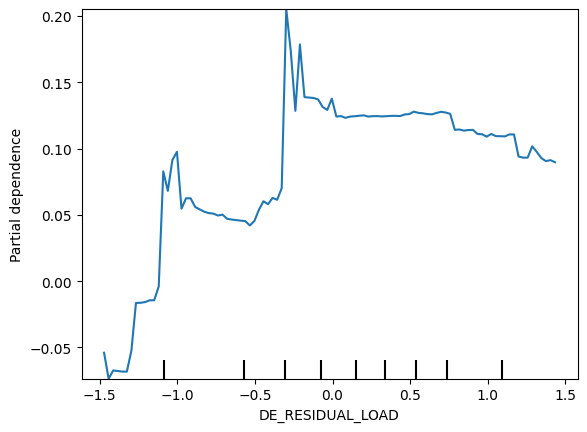

In [25]:
from sklearn.inspection import plot_partial_dependence

# Choose a feature
list_features = ["DE_NET_IMPORT", "DE_WINDPOW", "DE_RESIDUAL_LOAD"]

# Plot PDP
for feature in list_features:
    plot_partial_dependence(model, X_train, [feature])
